In [1]:
!pip install scikit-learn==1.4.1.post1

# sklearn Setup
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error
from sklearn.linear_model import RidgeCV, Ridge, LassoCV, Lasso, LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Pandas Setup
import json
import glob
import pandas as pd
import numpy as np
import datetime as dt
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib import dates as mdates
from matplotlib.lines import Line2D

In [2]:
df = pd.read_csv("synthetic_data.csv")
label = df['reputation_score']
features = df.drop(columns=['reputation_score'])

In [3]:
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(features, label, test_size = 0.2)

In [4]:
scaler = StandardScaler()
x_train_sc_rf = scaler.fit_transform(x_train_rf)
x_test_sc_rf = scaler.transform(x_test_rf)
pca = PCA(n_components = x_train_sc_rf.shape[1])
pca_x_train_rf = pca.fit_transform(x_train_sc_rf)

[0.63405347 0.75569786 0.84176225 0.91225427 0.95530459 0.97861085
 0.99526652 1.        ]


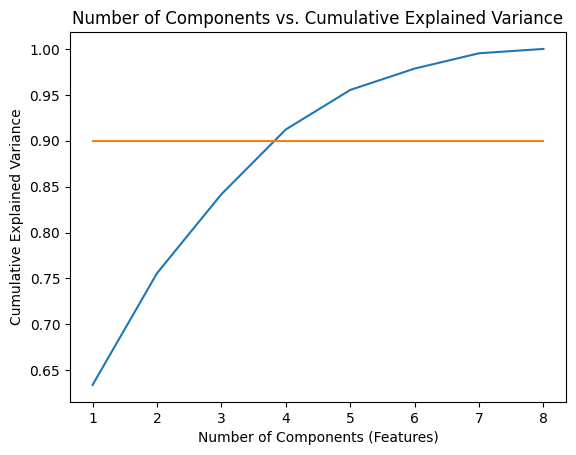


We first surpass 90% explained variance with 4 components.


In [5]:
cum_expl_var_ratios_rf = np.cumsum(pca.explained_variance_ratio_)
print(cum_expl_var_ratios_rf)

plt.plot(np.arange(1, 9), cum_expl_var_ratios_rf)
plt.plot(np.arange(1, 9), [0.90]*8)
plt.xlabel("Number of Components (Features)")
plt.ylabel("Cumulative Explained Variance")
plt.title("Number of Components vs. Cumulative Explained Variance")
plt.show()

print("")

for i in range(len(cum_expl_var_ratios_rf)):
  if cum_expl_var_ratios_rf[i] >= 0.90:
    print("We first surpass 90% explained variance with " + str(i + 1) + " components.")
    break

In [6]:
ideal_pca_rf = PCA(n_components = 4)
ideal_pca_rf.fit_transform(x_train_sc_rf)

# The x train/test set with only the ideal 4 components
ideal_pca_x_train_sc_rf = ideal_pca_rf.transform(x_train_sc_rf)
ideal_pca_x_test_sc_rf = ideal_pca_rf.transform(x_test_sc_rf)

In [7]:
rf_classifier = LogisticRegression()
rf_classifier.fit(ideal_pca_x_train_sc_rf, y_train_rf)
rf_preds = rf_classifier.predict(ideal_pca_x_test_sc_rf)
rf_accuracy = metrics.accuracy_score(y_test_rf, rf_preds)

print("Our Logistic Regression Classifier predicts with " + str(round(rf_accuracy * 100, 2)) + "% accuracy")

Our Logistic Regression Classifier predicts with 22.6% accuracy


In [8]:
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000, 2500, 5000]
    }
]

In [9]:
clf = GridSearchCV(rf_classifier, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(ideal_pca_x_train_sc_rf,y_train_rf)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
3120 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File

In [10]:
rf_preds = best_clf.predict(ideal_pca_x_test_sc_rf)
rf_accuracy = metrics.accuracy_score(y_test_rf, rf_preds)

print("Our Logistic Regression Classifier predicts with " + str(round(rf_accuracy * 100, 2)) + "% accuracy")

Our Logistic Regression Classifier predicts with 22.75% accuracy


In [11]:
from joblib import dump, load
dump(clf, 'reputation_model.joblib')

['reputation_model.joblib']